@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# FLIGHT PRICE PREDICTION

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

##### Size of training set: 10683 records

##### Size of test set: 2671 records

`FEATURES:`

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Task:
 

Need to build a machine learning model to predict the price of the flight ticket. 

 

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Extract datasets from csv file

train_data = pd.read_excel(r'C:\Users\91977\DataScienceProjects\DatatrainedProjects\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
test_data = pd.read_excel(r'C:\Users\91977\DataScienceProjects\DatatrainedProjects\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

### Here, we have 2 datsets : 
    One dataset for training purpose "train_data" and the other datset for testing "testing_data"

- train_data is for training purpose and test_data will be used for testing purpose in order to find the predictions

In [3]:
train_data   #display the train datset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [129]:
train_data.shape  #Let's check the dataset dimension

(10683, 11)

## Our dataset "10683" Journeys(rows) and 11 columns

In [5]:
train_data.info()  #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### All the features are of "Object DataType" and the Target column contains "Integer DataType"

In [4]:
train_data.isna().sum() #To check the total null values in all the columns individually

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

    Columns: 'Total_Stops' and 'Route' has 1 null data each

In [7]:
#Let's replace the null values with "null"

train_data['Total_Stops'] = train_data['Total_Stops'].fillna('null')
train_data['Route'] = train_data['Route'].fillna('null')

In [8]:
train_data[train_data['Total_Stops']=='null']  #Let's check the row that has "null value" in "Total_Stops" column

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,null,09:45,09:25 07 May,23h 40m,null,No info,7480


- We found that null value of Columns: 'Total_Stops' and 'Route' are present in a single row
- we can either remove the complete row or replace it 

##### Here, let's replace them instead of loosing our single journey details

In [9]:
#Let's extract the number of rows that contains the same data in other columns respectively

train_data[(train_data['Duration']=='23h 40m')&(train_data['Airline']=='Air India')&(train_data['Source']=='Delhi')&(train_data['Price']==7480)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480
7896,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,null,09:45,09:25 07 May,23h 40m,null,No info,7480


Here, after applying the above conditions, 
   - we found 5 rows with same equivalent data columns except the "Date_of_Journey" and "Arrival date"
   - Let's fill up these null values with the respective equivalent data instead of dropping the whole column

In [10]:
#Let's Replace them with common data

train_data['Route'].replace(to_replace ='null',value = 'DEL → MAA → COK',inplace=True)
train_data['Total_Stops'].replace(to_replace ='null',value = '1 stop',inplace=True)

In [12]:
train_data.isna().sum()  #Let's recheck the total of null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

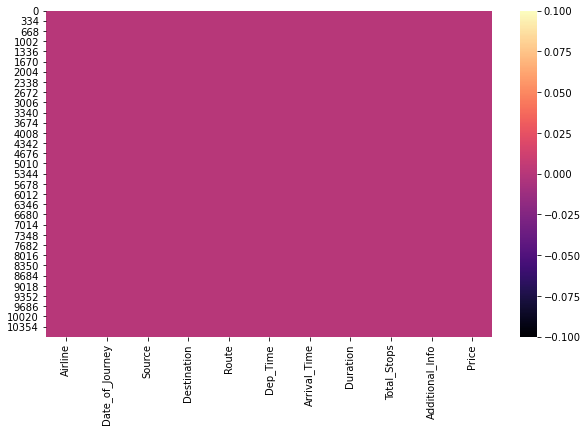

In [13]:
#Plot null values to check if any

plt.figure(figsize=(10,6))
sns.heatmap(train_data.isna(),cmap='magma')
plt.show()

    Our dataset contains no more null values. Hence, let's proceed further

# Exploratory Data Analysis (EDA)

Let us explore our dataset features and visualize it

### Univariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Density'>

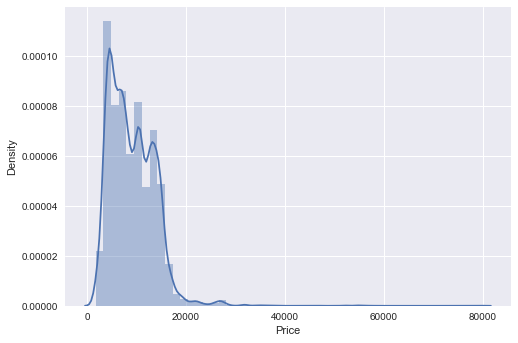

In [14]:
#Let's check the Target column : "Price"

plt.style.use('seaborn')
sns.distplot(train_data['Price'])

### Observation:
    - Flight prices sometimes, are extremely high 
    - But mostly, the flight prices are below "25000"

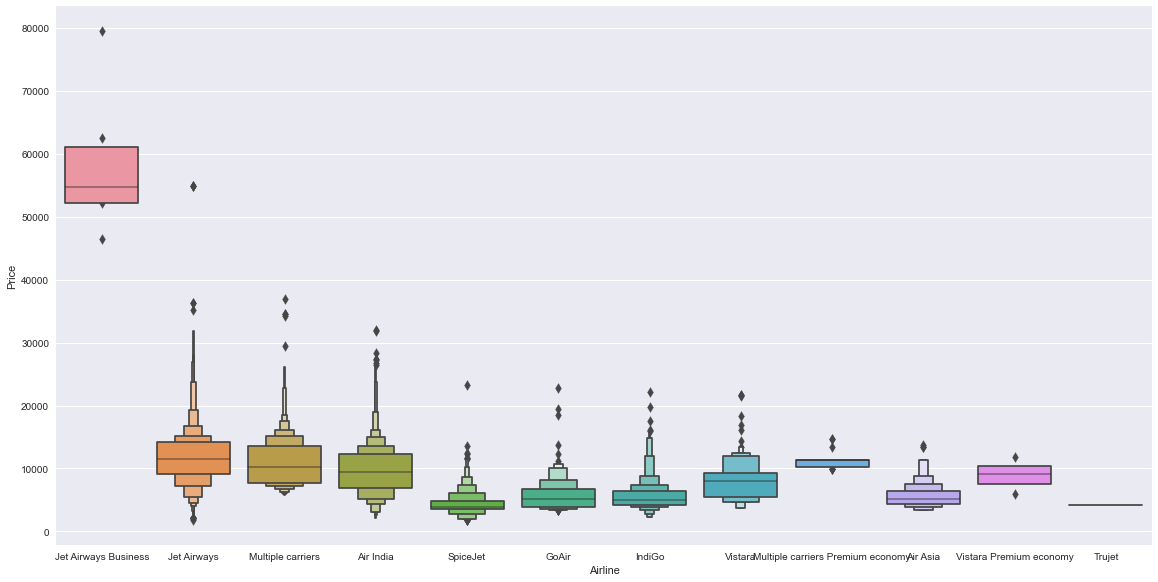

In [15]:
# Relation between Airline and Flight Price

sns.catplot(y = 'Price', x = 'Airline',data= train_data.sort_values("Price", ascending = False), 
            kind = "boxen", height = 8, aspect = 2)

plt.tight_layout
plt.show()

### Observation:
    - "Jet Airways Business" are with highest prices then, the Jet Airways
    - Rest other airliense are trending with the same price range
    - Where, Trujet is standing with the lowest flight price

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

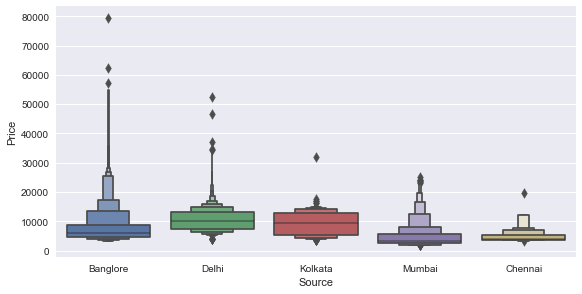

In [16]:
# Relation between Source and Flight Price

sns.catplot(y = 'Price', x = 'Source', data = train_data.sort_values("Price", ascending= False), 
            kind = "boxen", height=4, aspect = 2)

plt.tight_layout

### Observation:

- Flights take off from "Bangalore" city takes really very high price
- Then, Comes the city "Delhi", "Kolkata", "Mumbai" in the descending order of flight prices.
- Flights from "Chennai" are comparatively less costly

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

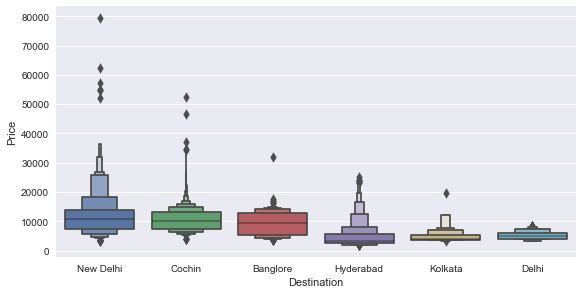

In [17]:
# Relation between Destination and Flight Price

sns.catplot(y = 'Price', x = 'Destination', data = train_data.sort_values("Price", ascending= False), 
            kind = "boxen", height=4, aspect = 2)

plt.tight_layout

#### Observation:

- Destination city: "New Delhi" Flights costs the highest
- Next comes, Destination city: "Cochin", "Bangalore", "Hyderabad", "Kolkata" in descending order of flight prices

## DATA ENGINEERING

<AxesSubplot:xlabel='Journey_day', ylabel='count'>

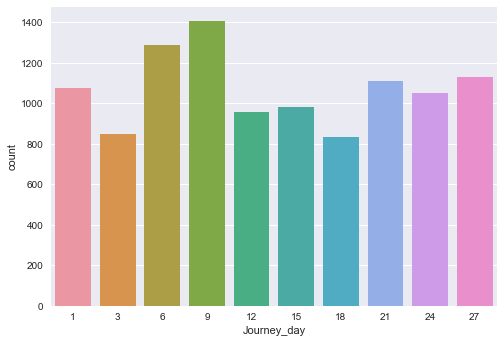

In [19]:
#extract day from ""Date_of_Journey""

train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day  


sns.countplot(x = 'Journey_day', data = train_data)

<AxesSubplot:xlabel='Journey_month', ylabel='count'>

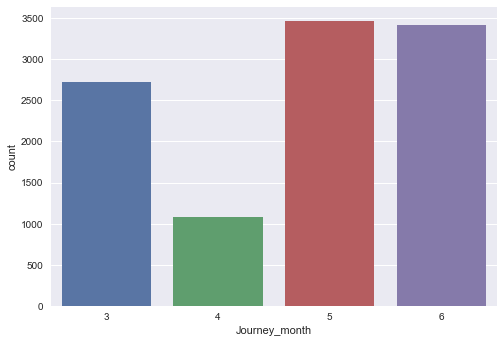

In [20]:

#extract month from ""Month_of_Journey""

train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month


sns.countplot(x = 'Journey_month', data = train_data)

    In the month of May and June there are large number of flight travels

In [21]:
train_data = train_data.drop(columns = 'Date_of_Journey')  #drop "Date_of_Journey"

In [22]:
train_data.head()  #let's display the same

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


<AxesSubplot:xlabel='Dep_hour', ylabel='count'>

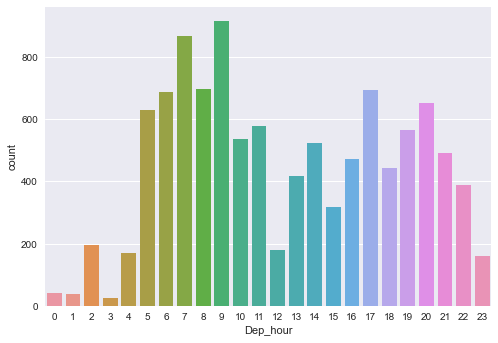

In [23]:
#extract hours from ""Dep_Time""

train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour


sns.countplot(x = 'Dep_hour', data = train_data)

    Most number of flights can be seen during the morning time and evening time, before midnight.

<AxesSubplot:xlabel='Dep_min', ylabel='count'>

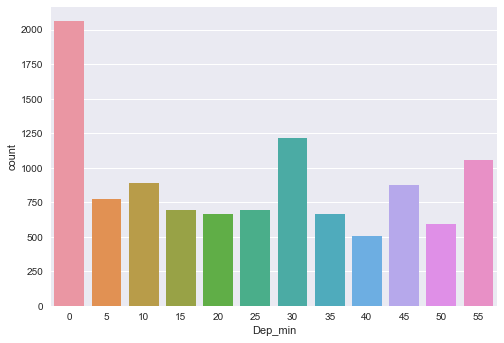

In [24]:

#extract minutes from ""Dep_Time""

train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

sns.countplot(x = 'Dep_min', data = train_data)

In [25]:
train_data = train_data.drop(columns = 'Dep_Time')  #drop "Dep_Time"

In [26]:
train_data.head() #let's display the same

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


<AxesSubplot:xlabel='Arrival_hour', ylabel='count'>

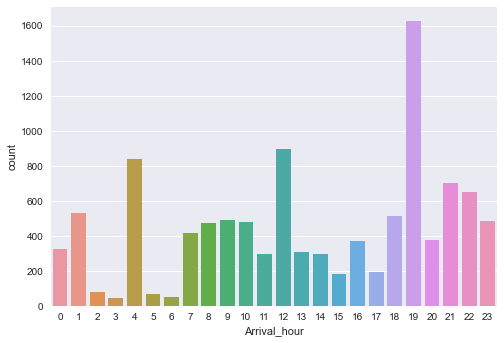

In [27]:
#extract hours from ""Arrival_Time""

train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour


sns.countplot(x = 'Arrival_hour', data = train_data)

    Most of the Flights during (2013-2017) were arrived around 7 o'clock

<AxesSubplot:xlabel='Arrival_min', ylabel='count'>

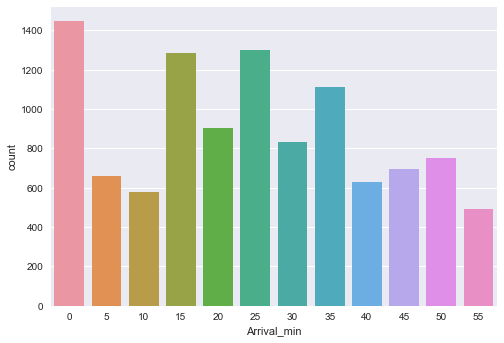

In [28]:

#extract minutes from ""Arrival_Time""
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute


sns.countplot(x = 'Arrival_min', data = train_data)

    Most of the fights arrives at exact hour with 0 mins

In [29]:
train_data = train_data.drop(columns = 'Arrival_Time')  #drop "Arrival_Time"

In [30]:
train_data.head(3) #let's display the same

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [31]:
# Assigning and converting Duration column into list

duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute if only hrs present
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour if only minute present

duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [32]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data['Duration_hour'] = duration_hour
train_data['Duration_min'] = duration_min

<AxesSubplot:xlabel='Duration_hour', ylabel='count'>

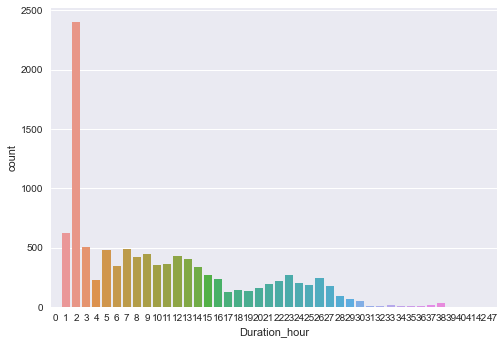

In [33]:
sns.countplot(x = 'Duration_hour', data = train_data)

    Most of the flights has duration hours of 2Hrs

<AxesSubplot:xlabel='Duration_min', ylabel='count'>

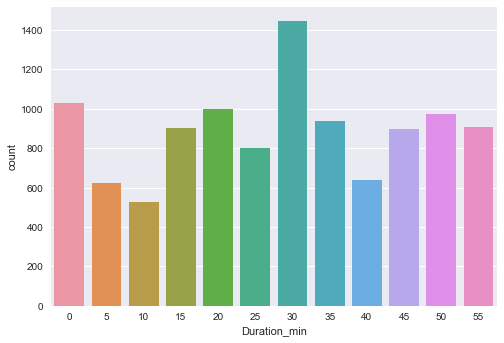

In [34]:
sns.countplot(x = 'Duration_min', data = train_data)  #mostly 30 mins comes up for duration in flights

In [35]:
train_data = train_data.drop(columns = 'Duration') #remove the duration column

In [131]:
#Let's check "Additional_Info" data

train_data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

    More than half of the rows has "No info", so, let's remove this column

In [133]:
#Let's check "Route" data

train_data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

    "Route" column shows the name of the routes of layovers and the same is mentioned in "Total stops" as it counts          the number of stops in the journey. 
    - Let's remove "Route" column

In [36]:
train_data = train_data.drop(columns = ['Route','Additional_Info'])  #To remove 'Route','Additional_Info' columns

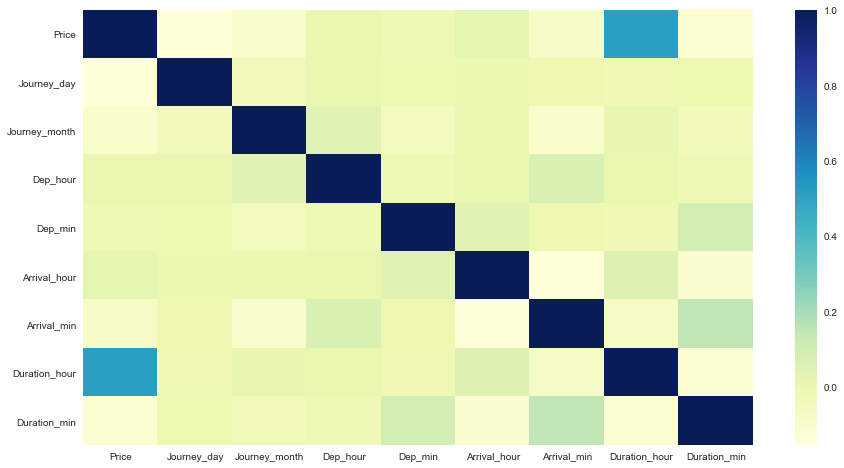

In [37]:
#Let's check the correlation by using the Heatmap (in order to check teh relation between features)

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),cmap='YlGnBu')
plt.show()

In [38]:
train_data.corr()  #To display the Correlation Table

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
Price,1.000000,-0.153738,-0.103651,0.006819,-0.024492,0.024264,-0.086155,0.508672,-0.124874
Journey_day,-0.153738,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511,-0.022181,-0.008996
Journey_month,-0.103651,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626,0.016175,-0.040880
Dep_hour,0.006819,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909,0.002783,-0.023746
Dep_min,-0.024492,-0.008261,-0.059238,-0.024806,1.000000,0.043054,-0.017594,-0.021946,0.092548
Arrival_hour,0.024264,-0.003192,-0.003941,0.005215,0.043054,1.000000,-0.154362,0.055180,-0.118345
Arrival_min,-0.086155,-0.017511,-0.100626,0.067909,-0.017594,-0.154362,1.000000,-0.074439,0.151626
Duration_hour,0.508672,-0.022181,0.016175,0.002783,-0.021946,0.055180,-0.074439,1.000000,-0.126355
Duration_min,-0.124874,-0.008996,-0.040880,-0.023746,0.092548,-0.118345,0.151626,-0.126355,1.000000


#### Observations:

    Almost all the features are with least correlation, Hence, we will proceed with these features as there is no 2 or more features with high similarity(correlation) with each other

- Most of the data are under "- 0.6"   to   "+ 0.6"

## Encoding the Categorical data

Let's encode our data columns which are categorical 

In [39]:
train_data.columns #To Display the colum names

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hour', 'Duration_min'],
      dtype='object')

In [40]:
#let's check the unique value of the data in "Airline" column and check their total counts respectively

train_data['Airline'].value_counts()  

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [41]:
Airline=train_data[["Airline"]]  
Airline= pd.get_dummies(Airline) #Get dummies for the Airline Column

Airline.head() #display the dummies available

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [42]:
train_data['Source'].unique() #To check the unique value of "Source Column"

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [43]:
Source=train_data[["Source"]]  
Source= pd.get_dummies(Source) #Get dummies for the Source Column

Source.head() #display the dummies available

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [44]:
train_data['Destination'].unique() #To check the unique value of "Destination Column"

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [45]:
Destination=train_data[["Destination"]]  
Destination= pd.get_dummies(Destination)  #Get dummies for the Destination Column
Destination.head()  #display the dummies available

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [46]:
# Concatenate dataframe with the above extracted dummies

# (train_data + airline + source and destination)

train_data = pd.concat([train_data,Airline,Source,Destination],axis=1)

train_data.head() #To display the new dataset

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [47]:
train_data = train_data.drop(columns = ['Airline','Source','Destination'])  #To remove these columns as the dummies have been applied

In [141]:
train_data['Total_Stops'].unique()  #To check the unique value of "Total_Stops Column"

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
#Let's replace Total_Stops columns with numbers

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [49]:
train_data.head()  #Display our new data

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [50]:


train_data.columns  #Let's check the column names of our updated datset

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

As we have all ordinal data hence, we will not check for the outliers and skewness

### Splitting Features and Labels

In [51]:
X = train_data.drop(columns = 'Price') #features
Y = train_data['Price'] #labels

In [52]:
#let's check for our dimensions after splitting the data

print('Features dimension:\t',X.shape,'\nLabel Dimension:\t',Y.shape)

Features dimension:	 (10683, 32) 
Label Dimension:	 (10683,)


### Scaling

As we have all ordinal data, SO, there is no need of scaling the data

### Finding Best Random State
Let's find out the best Random State which can be used for all our models

In [54]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(150):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.6759480343808661  with Random State  57


### Train Test Split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size =0.20, random_state = maxRS)


# Model Building
let's build multiple models and check for the best model by using the Cross_val_score metrics


#### Model: Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

In [57]:
R1 = r2_score(y_test, y_pred_lr)
print('R Squared (R2): ',R1)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_lr))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_lr))

R Squared (R2):  0.6759480343808661
Mean Squared Error (MSE):  7105900.052231869
Root Mean Squared Error (RMSE):  2665.6894140600607
Mean Absolute Error (MAE):  1928.585099339893


In [58]:
C1 = cross_val_score(lr,X,Y,cv=5).mean()

print('Cross validation Score: ', C1)


Cross validation Score:  0.6196085931083752


#### Model: Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

rand = RandomForestRegressor()
rand.fit(x_train,y_train)

y_pred_rand = rand.predict(x_test)

In [60]:

R2 = r2_score(y_test, y_pred_rand)
print('R Squared (R2): ',R2)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_rand))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_rand)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_rand))

R Squared (R2):  0.8160050744881235
Mean Squared Error (MSE):  4034691.00490481
Root Mean Squared Error (RMSE):  2008.6540281752877
Mean Absolute Error (MAE):  1195.5929492873113


In [61]:
C2 = cross_val_score(rand,X,Y,cv=5).mean()
print('Cross validation Score: ', C2)


Cross validation Score:  0.812226221570781


#### Model: DecisionTreeRegressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_features='auto')
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

In [63]:

R3 = r2_score(y_test, y_pred_dt)
print('R Squared (R2): ',r2_score(y_test, y_pred_dt))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_dt))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_dt))

R Squared (R2):  0.7534437624738785
Mean Squared Error (MSE):  5406552.550198487
Root Mean Squared Error (RMSE):  2325.1994646048083
Mean Absolute Error (MAE):  1366.5544922788956


In [64]:

C3 = cross_val_score(dt,X,Y,cv=5).mean()
print('Cross validation Score: ', C3)

Cross validation Score:  0.7130567991023179


#### Model: KNeighbors Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

y_pred_kn = kn.predict(x_test)

In [66]:

R4 = r2_score(y_test, y_pred_kn)
print('R Squared (R2): ',R4)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_kn))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_kn)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_kn))

R Squared (R2):  0.594931355439148
Mean Squared Error (MSE):  8882455.926607393
Root Mean Squared Error (RMSE):  2980.3449341657406
Mean Absolute Error (MAE):  1810.598315395414


In [67]:

C4 = cross_val_score(kn,X,Y,cv=5).mean()
print('Cross validation Score: ', C4)


Cross validation Score:  0.5868075287012106


#### Model: Gradient Boosting Regressor

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

y_pred_gb = gb.predict(x_test)

In [69]:

R5 = r2_score(y_test, y_pred_gb)
print('R Squared (R2): ',R5)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_gb))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_gb))

R Squared (R2):  0.7915808698558731
Mean Squared Error (MSE):  4570271.638215997
Root Mean Squared Error (RMSE):  2137.819365198098
Mean Absolute Error (MAE):  1519.7508598798372


In [70]:

C5 = cross_val_score(gb,X,Y,cv=5).mean()
print('Cross validation Score: ', C5)

Cross validation Score:  0.7694547198158785


#### Model: Ridge

In [71]:

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train,y_train)

y_pred_ridge = ridge.predict(x_test)

In [72]:

R6 = r2_score(y_test, y_pred_ridge)
print('R Squared (R2): ',R6)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_ridge))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_ridge))

R Squared (R2):  0.662241133896657
Mean Squared Error (MSE):  7406468.711584351
Root Mean Squared Error (RMSE):  2721.48281486111
Mean Absolute Error (MAE):  1937.92327329376


In [73]:

C6 = cross_val_score(ridge,X,Y,cv=5).mean()
print('Cross validation Score: ', C6)

Cross validation Score:  0.6187644004510835


#### Model: Lasso

In [74]:
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso.fit(x_train,y_train)

y_pred_Lasso = Lasso.predict(x_test)

In [75]:

R7 = r2_score(y_test, y_pred_Lasso)
print('R Squared (R2): ',R7)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_Lasso))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_Lasso)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_Lasso))

R Squared (R2):  0.6744175853692429
Mean Squared Error (MSE):  7139460.156367803
Root Mean Squared Error (RMSE):  2671.976825567131
Mean Absolute Error (MAE):  1924.2780385203464


In [76]:

C7 = cross_val_score(Lasso,X,Y,cv=3).mean()
print('Cross validation Score: ', C7)


Cross validation Score:  0.6190674432488532


#### Let's Check the Overall scores of our models

In [77]:
#Let's create the DataFrame

Overall_Score = pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','Decision Tree','Kneighbors','Gradient Boosting Regressor','Ridge','Lasso'],
                              'R2_Score':[R1,R2,R3,R4,R5,R6,R7],
                              'Cross_Validation_Score':[C1,C2,C3,C4,C5,C6,C7]})

#get the difference between the R2 Score and the Cross validation score

Overall_Score['Difference'] = Overall_Score['R2_Score'] - Overall_Score['Cross_Validation_Score'] 

In [78]:
Overall_Score  #Display the dataFrame

,Model,R2_Score,Cross_Validation_Score,Difference
0,Linear Regression,0.675948,0.619609,0.056339
1,Random Forest Regressor,0.816005,0.812226,0.003779
2,Decision Tree,0.753444,0.713057,0.040387
3,Kneighbors,0.594931,0.586808,0.008124
4,Gradient Boosting Regressor,0.791581,0.769455,0.022126
5,Ridge,0.662241,0.618764,0.043477
6,Lasso,0.674418,0.619067,0.055350


In [79]:
Overall_Score['Difference'].min()

0.00377885291734259

In [142]:

Overall_Score[Overall_Score['Difference']==0.00377885291734259]

,Model,R2_Score,Cross_Validation_Score,Difference
1,Random Forest Regressor,0.816005,0.812226,0.003779


    "Random Forest Regressor" model comes up with "high R2_score" and with least difference between the R2 Score and          the Cross validation score

# "Random Forest Regressor" is our best model

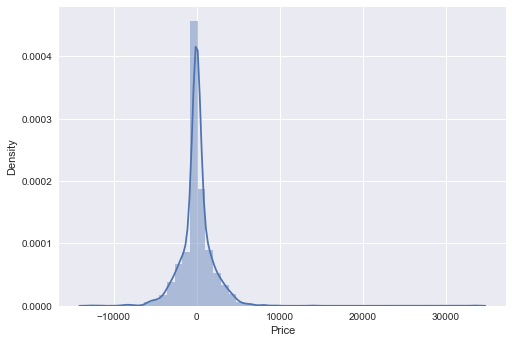

In [81]:
#Let's plot the difference between the y_test price and our model predicted price


sns.distplot(y_test - y_pred_rand)
plt.show()

- We could see most of the most of the difference falls around "Zero" but we could see that the are some data more that Zero

    Let's hyper tune our model in order to get more close predictions with the actual prices

## Hyper Parameter Tuning

In [82]:
from sklearn.model_selection import RandomizedSearchCV  #import library

In [83]:
#RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [84]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [85]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
Rand_final = RandomizedSearchCV(estimator = rand, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [86]:

Rand_final.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=   6.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=918; total time=  13.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=918; total time=  12.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [87]:
print( Rand_final.best_params_)  #best parameters

{'n_estimators': 590, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


In [88]:
predictions = Rand_final.predict(x_test)  #let's get the predictions for our test data

## Saving the model for future prediction:

In [89]:
#Let's save our model for future predictions

import joblib

joblib.dump(Rand_final,'Flight_Price_Prediction.obj')

['Flight_Price_Prediction.obj']

## Performance Metrics of the model


Let's check the model performance

In [90]:
print('R Squared (R2): ',r2_score(y_test,predictions))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,predictions))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,predictions))


R Squared (R2):  0.8371362500484042
Mean Squared Error (MSE):  3571320.812933807
Root Mean Squared Error (RMSE):  1889.7938546131975
Mean Absolute Error (MAE):  1144.191563505802


In [143]:


# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test)

Predictions

array([7792.47411077, 7443.99906518, 3922.96088672, ..., 4569.0110734 ,
       6065.99443735, 5509.08599805])

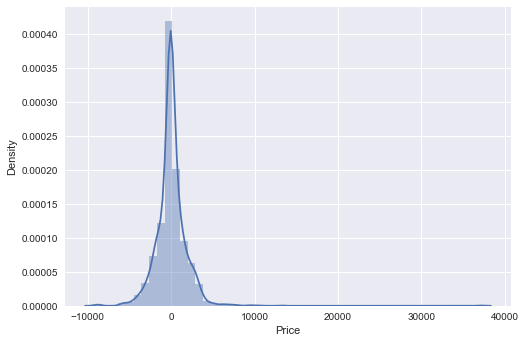

In [144]:
#Let's again plot the difference between the y_test price and our model predicted price

sns.distplot(y_test-Predictions)
plt.show()

- We could now see there is a slight change and now we have most data with zero difference

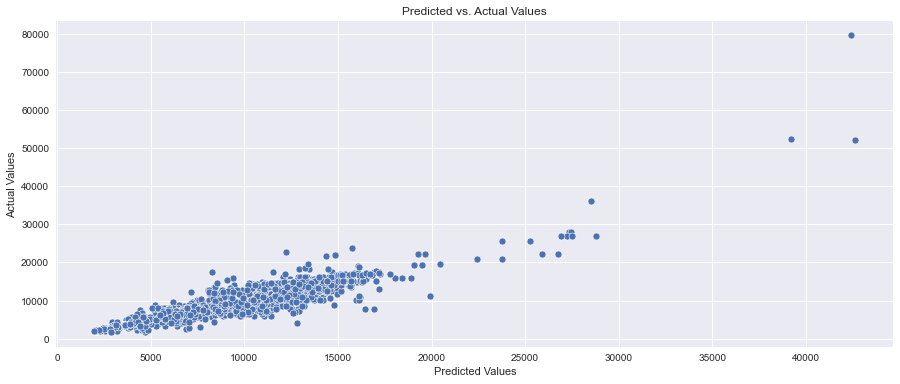

In [145]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.scatterplot(x=Predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

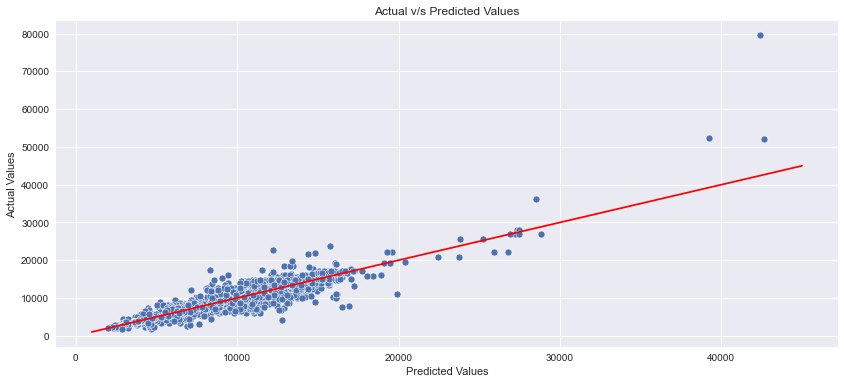

In [155]:
# plot LOO predictions against actual
plt.figure(figsize=[14,6])

plot_LOO = sns.scatterplot(Predictions,y_test)
plot_LOO.set(xlabel='Predicted Values', ylabel='Actual Values')
# generate and graph y = x line
x_plot = np.linspace(1000,45000)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.title("Actual v/s Predicted Values")
plt.show()

    The above graph indicates that most of the "Actual and Predicted" values are close to each other

## After hyper tuning , Our model score is now increased by 2.11% of acuracy score

# Hence, our model is ready with 83.71 % of Acuracy Score

---------------

## Test Data

    Let's perform the same steps that were used for train data

In [94]:
#extract the test data

test_data = pd.read_excel(r'C:\Users\91977\DataScienceProjects\DatatrainedProjects\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [95]:
test_data.shape  #to check the test data dimensions

(2671, 10)

In [96]:
test_data.isna().sum()  #to check the null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [97]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info


In [99]:
# performing  all the steps again for the test data.

print("Test data Info")
print("-"*75)
print(test_data.info())

#DATA ENGINEERING


# Date_of_Journey
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.day  
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.month
test_data = test_data.drop(columns = 'Date_of_Journey')  #drop "Date_of_Journey"

# Dep_Time
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data = test_data.drop(columns = 'Dep_Time')  #drop "Dep_Time"

# Arrival_Time
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data = test_data.drop(columns = 'Arrival_Time')  #drop "Arrival_Time"


# Duration
# Assigning and converting Duration column into list
duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute if only hrs present
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour if only minute present

duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding duration_hours and duration_mins list to train_data dataframe
test_data['Duration_hour'] = duration_hour
test_data['Duration_min'] = duration_min

test_data = test_data.drop(columns = ['Duration'])


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airlines=test_data[["Airline"]]  
Airlines= pd.get_dummies(Airlines) #Get dummies
print()



print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Sources=test_data[["Source"]]  
Sources= pd.get_dummies(Sources) #Get dummies
print()





print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destinations=test_data[["Destination"]]  
Destinations= pd.get_dummies(Destinations) #Get dummies
print()

# Concatenate dataframe 

# (test_data + airline + source and destination)
test_data = pd.concat([test_data,Airlines,Sources,Destinations],axis=1)
test_data.head()

test_data = test_data.drop(columns = ['Airline','Source','Destination'])


# Additional_Info contains almost 80% no_info
test_data.drop(["Route","Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
print(test_data["Total_Stops"].value_counts())
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


print("Shape of test data : ", test_data.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multipl

In [100]:
test_data   #after all the above steps, here we can see the updated test_data which is ready for predictions

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,0,...,0,0,1,0,1,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,1,0,1,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,1,0,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,0,...,0,1,0,0,0,1,0,0,0,0


In [102]:
test_data.columns  #recheck the column names in test_data

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [101]:
train_data.columns  #recheck the column names in train_data

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

- We foound that column: "Airline_Trujet" is missing in the test_data dataset

In [103]:
#Let's add a new column: "Airline_Trujet" in test_data dataset with the values "0",
# as there is no flight in test data which operates with "Trujet" Airline

test_data['Airline_Trujet'] = 0

In [104]:
test_data['Airline_Trujet'].unique()

array([0], dtype=int64)

In [105]:
test_data.columns #let's recheck the column names

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Trujet'],
      dtype='object')

'Airline_Trujet' column is added successfully

    Our dataset is now completely ready to be used for predictions

## Making Predictions using the saved model

In [106]:
#Load the saved model
import joblib

loaded_model = joblib.load(open('Flight_Price_Prediction.obj','rb'))  #loading the saved model

In [117]:
Testdata_Predictions = loaded_model.predict(test_data)  #predicting the test data using the loaded model

In [118]:
pd.set_option ('display.max_rows', None)  #to display maximum rows


#creating a DataFrame that contains only the predictions

Testdata_Predictions = pd.DataFrame(Testdata_Predictions,columns = ['Predicted_Price'])  
Testdata_Predictions


,Predicted_Price
0,11749.539908
1,8006.809785
2,13913.234516
3,10469.541551
4,4243.886213
5,10868.718045
6,10256.189141
7,6248.471607
8,4770.854441
9,16455.208968


In [119]:

test_data = pd.read_excel(r'C:\Users\91977\DataScienceProjects\DatatrainedProjects\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

#Let's concatinate both test_data and the predicted data set

Predicted_Result = pd.concat([test_data,Testdata_Predictions],axis=1)
Predicted_Result.head() #display it

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted_Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,11749.539908
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,8006.809785
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13913.234516
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,10469.541551
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4243.886213


In [123]:
#Saving the predicted price DataFrame along with the test data in csv file


#Saving the dataframe in a csv file


Predicted_Result.to_csv('TestData_Flight_Price_Predicted_Result.csv',index=False)

In [148]:
#Let's confirm the saved dataframe in a csv file and display it

flight_price_data = pd.read_csv(r'TestData_Flight_Price_Predicted_Result.csv')  #to extract the csv file

flight_price_data.head(5) #display

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted_Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,11749.539908
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,8006.809785
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13913.234516
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,10469.541551
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4243.886213


###### We could see that the test dataset with their Price predictions respectively are saved in a csv file successfully

---------------

# Our Model is ready for flight predictions with 83.71 % of Accuracy

---------------